In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import cv2 as cv

In [2]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [3]:
len(xtrain)

60000

In [4]:
len(xtest)

10000

In [5]:
xtrain.shape

(60000, 28, 28)

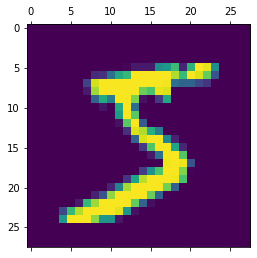

In [6]:
plt.matshow(xtrain[0])

In [7]:
xtrain = tf.keras.utils.normalize(xtrain, axis = 1)
xtest = tf.keras.utils.normalize(xtest, axis = 1)

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(xtrain,ytrain, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2536 - accuracy: 0.9261
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1028 - accuracy: 0.9684
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9788


In [26]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9709


[0.09441176056861877, 0.9708999991416931]

In [27]:
ypred = model.predict(xtest)
ypred_labels = [np.argmax(i) for i in ypred]

In [28]:
cf = tf.math.confusion_matrix(ytest,ypred_labels)

Text(69.0, 0.5, 'real')

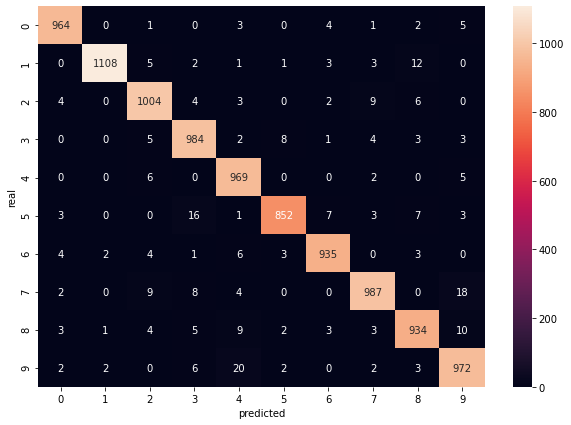

In [29]:
plt.figure(figsize = (10,7))
sns.heatmap(cf,annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('real')

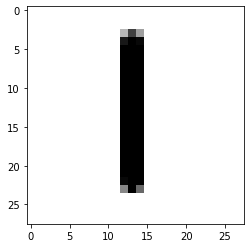

The result is probably : 1


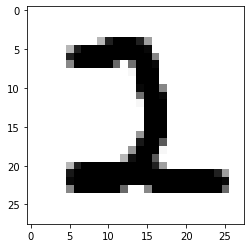

The result is probably : 2


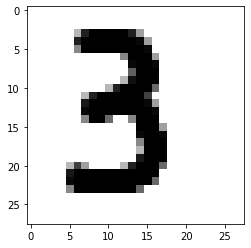

The result is probably : 3


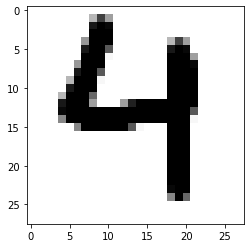

The result is probably : 4


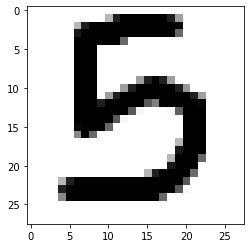

The result is probably : 5


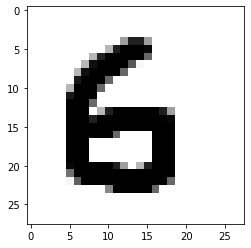

The result is probably : 5


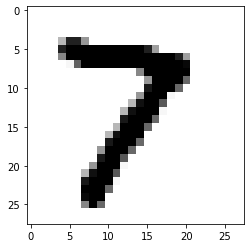

The result is probably : 7


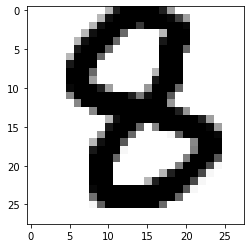

The result is probably : 8


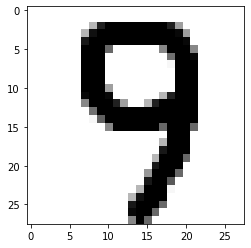

The result is probably : 6


In [30]:
import glob
for file in glob.glob(r"C:\Users\Shivam Jong Suk\Desktop\OpenCV\New folder\*.png"):
    images = [cv.imread(file)[:,:,0]]
    images = np.invert(images)
    prediction = model.predict(images)  
    plt.imshow(images[0], cmap=plt.cm.binary)
    plt.show()
    print('The result is probably :', np.argmax(prediction))  